Data Preparation

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
# read in the json files
portfolio_df = pd.read_json('https://raw.githubusercontent.com/passat05/mlcamp_capstone_2/master/data/portfolio.json', orient='records', lines=True)
profile_df = pd.read_json('https://raw.githubusercontent.com/passat05/mlcamp_capstone_2/master/data/profile.json', orient='records', lines=True)
transcript_df = pd.read_json('https://raw.githubusercontent.com/passat05/mlcamp_capstone_2/master/data/transcript.json', orient='records', lines=True)

Data Exploration: Profile

In [3]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [4]:
profile_df.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

C:\Users\TruongVanThoi\AppData\Local\Temp\ipykernel_18136\2389579654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=profile_df, x="gender", palette="viridis", order=profile_df["gender"].value_counts().index)


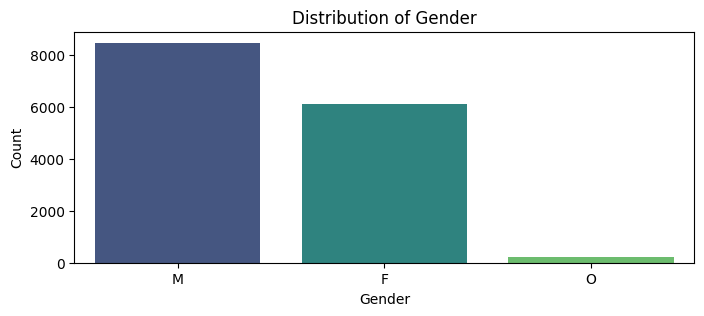

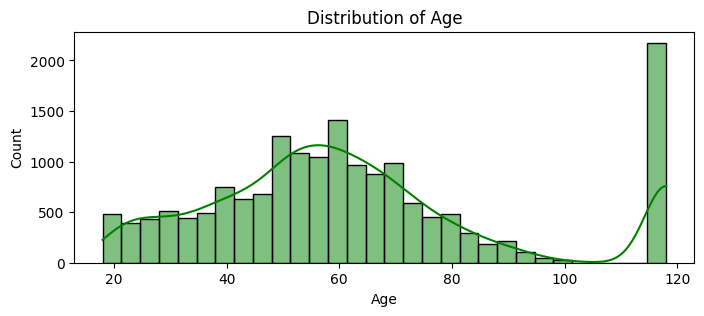

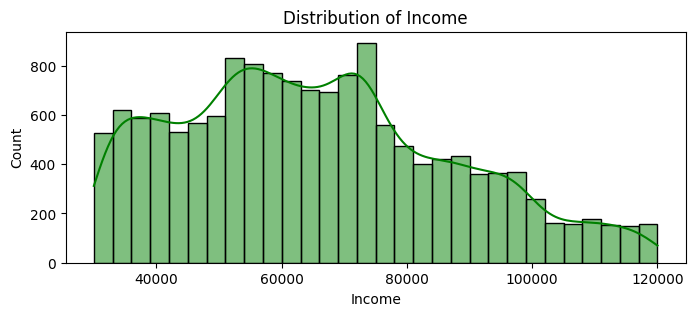

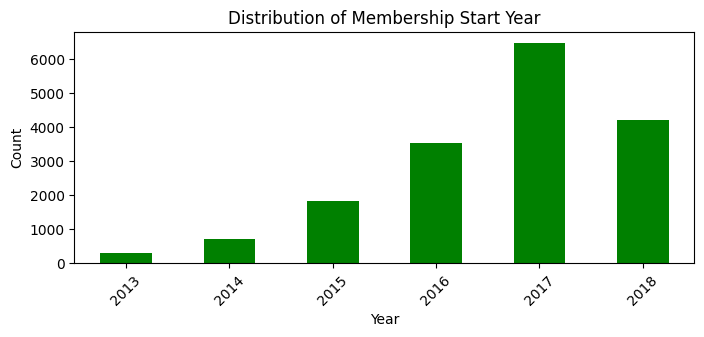

In [5]:
# Data Exploration for the profile dataset

# 1. Gender distribution
plt.figure(figsize=(8, 3))
sns.countplot(data=profile_df, x="gender", palette="viridis", order=profile_df["gender"].value_counts().index)
plt.title("Distribution of Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()

# 2. Age distribution
plt.figure(figsize=(8, 3))
sns.histplot(profile_df["age"], bins=30, kde=True, color="green")
plt.title("Distribution of Age")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

# 3. Income distribution
plt.figure(figsize=(8, 3))
sns.histplot(profile_df["income"], bins=30, kde=True, color="green")
plt.title("Distribution of Income")
plt.ylabel("Count")
plt.xlabel("Income")
plt.show()

# 4. Membership start date distribution
# Convert 'became_member_on' from int to datetime
profile_df["became_member_on"] = pd.to_datetime(profile_df["became_member_on"], format="%Y%m%d")

plt.figure(figsize=(8, 3))
profile_df["became_member_on"].dt.year.value_counts().sort_index().plot(kind="bar", color="green")
plt.title("Distribution of Membership Start Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

In [6]:
profile_df.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [7]:
# Replace age 118 with median of age (as it seems to be a placeholder for missing data)
median_age = profile_df[profile_df["age"] != 118]["age"].median()
profile_df["age"].replace(118, median_age, inplace=True)

#Fill missing value of age column with median age as well
profile_df["age"] = profile_df["age"].fillna(median_age)

# 2. Handle missing values in the gender and income columns
# Replace 'None' in gender with Others ("O")
profile_df["gender"].replace("None", "O", inplace=True)

#Fill missing value of gender with "Other" as a assumption
profile_df["gender"] = profile_df["gender"].fillna("O")

#Fill missing value of income with median income of the dataset
median_income = profile_df["income"].median()
profile_df["income"] = profile_df["income"].fillna(median_income)

In [8]:
profile_df.isnull().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

Data Exploration: Transcript

In [9]:
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [10]:
transcript_df.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [11]:
transcript_df.tail()

,person,event,value,time
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


C:\Users\TruongVanThoi\AppData\Local\Temp\ipykernel_18136\3844266785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transcript_df, x="event", palette="viridis", order=transcript_df["event"].value_counts().index)


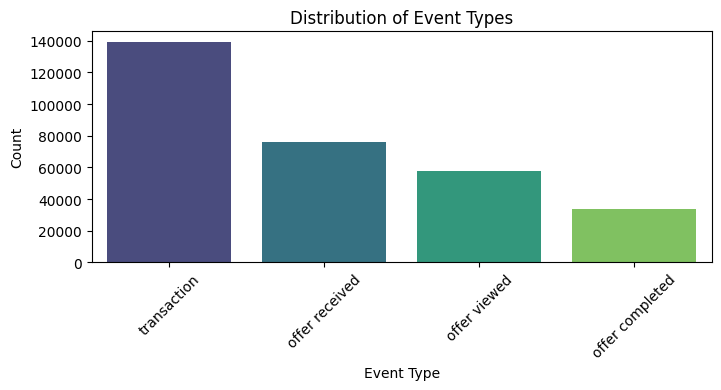

In [12]:
# Distribution of Event Types
plt.figure(figsize=(8, 3))
sns.countplot(data=transcript_df, x="event", palette="viridis", order=transcript_df["event"].value_counts().index)
plt.title("Distribution of Event Types")
plt.ylabel("Count")
plt.xlabel("Event Type")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Exploration of 'value' column
# Let's extract the type of keys present in the 'value' dictionary to understand its structure
value_keys = transcript_df["value"].apply(lambda x: list(x.keys())).explode().unique()

value_keys

array(['offer id', 'amount', 'offer_id', 'reward'], dtype=object)

In [14]:
# Standardize the keys in the 'value' column
def standardize_keys(value_dict):
    if 'offer id' in value_dict:
        value_dict['offer_id'] = value_dict.pop('offer id')
    return value_dict
transcript_df["value"] = transcript_df["value"].apply(standardize_keys)

In [15]:
# Display the unique keys in the 'value' column after cleaning
value_keys_cleaned = transcript_df["value"].apply(lambda x: list(x.keys())).explode().unique()

value_keys_cleaned

array(['offer_id', 'amount', 'reward'], dtype=object)

Data Exploration: Portfolio 

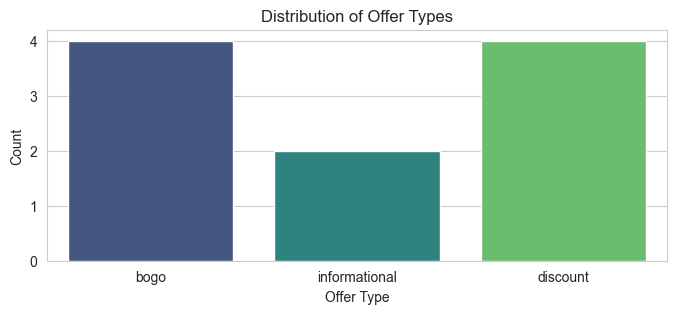

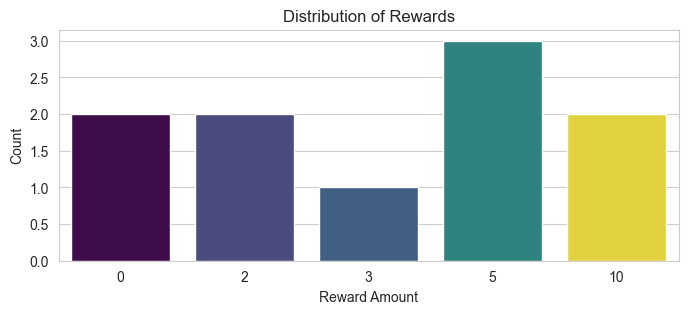

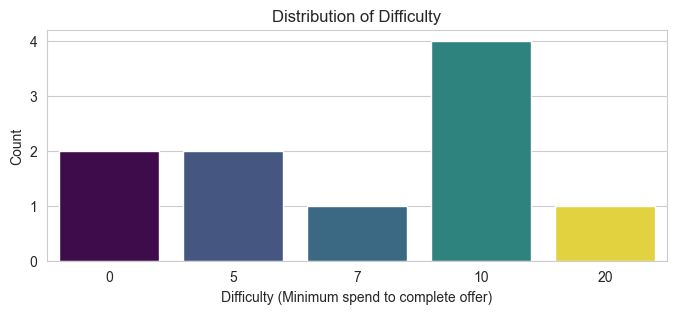

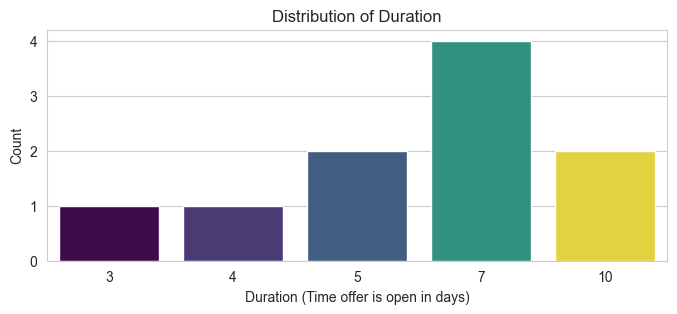

In [16]:
def plot_distribution(data, x, title, ylabel, xlabel):
    plt.figure(figsize=(8, 3))
    sns.countplot(data=data, x=x, palette="viridis", hue=x, legend=False)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

# Set the style for the plots
sns.set_style("whitegrid")

# Offer types distribution
plot_distribution(portfolio_df, "offer_type", "Distribution of Offer Types", "Count", "Offer Type")

# Distribution of Rewards
plot_distribution(portfolio_df, "reward", "Distribution of Rewards", "Count", "Reward Amount")

# Distribution of Difficulty
plot_distribution(portfolio_df, "difficulty", "Distribution of Difficulty", "Count", "Difficulty (Minimum spend to complete offer)")

# Distribution of Duration
plot_distribution(portfolio_df, "duration", "Distribution of Duration", "Count", "Duration (Time offer is open in days)")

Data Processing

In [17]:
# One-hot encode the 'offer_type' column
offer_type_encoded = pd.get_dummies(portfolio_df["offer_type"], prefix="offer_type") + 0

In [18]:
# Expand the 'channels' list into separate binary columns for each channel
channels_encoded = portfolio_df["channels"].apply(lambda x: pd.Series([1 if channel in x else 0 for channel in ["web", "email", "mobile", "social"]], 
                                                  index=["web", "email", "mobile", "social"]))

In [19]:
# Concatenate the one-hot encoded columns with the original dataframe and drop the original 'offer_type' and 'channels' columns
portfolio_preprocessed = pd.concat([portfolio_df, offer_type_encoded, channels_encoded], axis=1).drop(columns=["offer_type", "channels"])

In [20]:
portfolio_preprocessed.head()

,reward,difficulty,duration,id,offer_type_bogo,offer_type_discount,offer_type_informational,web,email,mobile,social
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,0,1,1,1
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,1,1,1,1
2,0,0,4,3f207df678b143eea3cee63160fa8bed,0,0,1,1,1,1,0
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,1,1,1,0
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,1,1,0,0


In [21]:
# Extract the offer_id and amount from the 'value' column in the transcript dataframe
transcript_df["offer_id"] = transcript_df["value"].apply(lambda x: x.get("offer_id"))
transcript_df["amount"] = transcript_df["value"].apply(lambda x: x.get("amount", 0))

transcript_df.drop(columns=["value"], inplace=True)
transcript_df.head()

,person,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0


In [22]:
# Merge the transcript dataset with the profile dataset based on the customer ID
merged_df = pd.merge(transcript_df, profile_df, left_on="person", right_on="id", how="left").drop(columns="id")

# Merge the resulting dataframe with the portfolio_preprocessed dataset based on the offer ID
merged_df = pd.merge(merged_df, portfolio_preprocessed, left_on="offer_id", right_on="id", how="left").drop(columns="id")

# Display the first few rows of the merged DataFrame
merged_df.head()

,person,event,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type_bogo,offer_type_discount,offer_type_informational,web,email,mobile,social
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,F,75,2017-05-09,100000.0,5.0,5.0,7.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,O,55,2017-08-04,64000.0,5.0,20.0,10.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,M,68,2018-04-26,70000.0,2.0,10.0,7.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,O,55,2017-09-25,64000.0,2.0,10.0,10.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,O,55,2017-10-02,64000.0,10.0,10.0,5.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


Feature Engineering

In [23]:
# Feature Engineering for the merged dataframe

# Calculate Membership Duration
current_date = pd.Timestamp.now()
merged_df["membership_duration"] = (current_date - merged_df["became_member_on"]).dt.days

# Event Type Encoding
event_encoded = pd.get_dummies(merged_df["event"], prefix="event") + 0
merged_df = pd.concat([merged_df, event_encoded], axis=1)

# Display the first few rows of the dataframe after feature engineering
merged_df.head()

,person,event,time,offer_id,amount,gender,age,became_member_on,income,reward,...,offer_type_informational,web,email,mobile,social,membership_duration,event_offer completed,event_offer received,event_offer viewed,event_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,F,75,2017-05-09,100000.0,5.0,...,0.0,1.0,1.0,1.0,0.0,2449,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,O,55,2017-08-04,64000.0,5.0,...,0.0,1.0,1.0,0.0,0.0,2362,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,M,68,2018-04-26,70000.0,2.0,...,0.0,1.0,1.0,1.0,0.0,2097,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,O,55,2017-09-25,64000.0,2.0,...,0.0,1.0,1.0,1.0,1.0,2310,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,O,55,2017-10-02,64000.0,10.0,...,0.0,1.0,1.0,1.0,1.0,2303,0,1,0,0


In [24]:
merged_df.columns

Index(['person', 'event', 'time', 'offer_id', 'amount', 'gender', 'age',
       'became_member_on', 'income', 'reward', 'difficulty', 'duration',
       'offer_type_bogo', 'offer_type_discount', 'offer_type_informational',
       'web', 'email', 'mobile', 'social', 'membership_duration',
       'event_offer completed', 'event_offer received', 'event_offer viewed',
       'event_transaction'],
      dtype='object')

In [25]:
merged_df.dtypes

person                              object
event                               object
time                                 int64
offer_id                            object
amount                             float64
gender                              object
age                                  int64
became_member_on            datetime64[ns]
income                             float64
reward                             float64
difficulty                         float64
duration                           float64
offer_type_bogo                    float64
offer_type_discount                float64
offer_type_informational           float64
web                                float64
email                              float64
mobile                             float64
social                             float64
membership_duration                  int64
event_offer completed                int32
event_offer received                 int32
event_offer viewed                   int32
event_trans

In [26]:
# Rename some columns for better processing later
merged_df.rename(columns={"event_offer completed": "event_offer_completed", "event_offer received": "event_offer_received", "event_offer viewed": "event_offer_viewed"}, errors="raise", inplace=True)

In [27]:
#Transform the unified dataframe in order to make the target variable 
merged_df = merged_df.groupby(['person','offer_id'], as_index=False).agg({'event_offer_received':'sum',
                                                              'event_offer_completed':'sum', 
                                                              'event_offer_viewed':'sum',
                                                              'time': 'first',
                                                              'gender': 'first',
                                                              'age': 'first', 
                                                              'became_member_on': 'first', 
                                                              'income': 'first', 
                                                              'difficulty': 'first', 
                                                              'duration': 'first',
                                                              'offer_type_bogo': 'first', 
                                                              'offer_type_discount': 'first', 
                                                              'offer_type_informational': 'first',
                                                              'web': 'first',
                                                              'email': 'first',
                                                              'mobile': 'first', 
                                                              'social': 'first', 
                                                              'membership_duration': 'first'})

In [38]:
merged_df['response'] = ((merged_df['event_offer_viewed'] == 1) & (merged_df['event_offer_completed'] == 1)).astype(int)

In [30]:
# For feature engineering, let's create a new feature that combines the 'difficulty' and 'income' as an interaction term
merged_df['difficulty_income_interaction'] = merged_df['difficulty'] * merged_df['income']

# Gender Encoding
gender_encoded = pd.get_dummies(merged_df["gender"], prefix="gender") + 0
merged_df = pd.concat([merged_df, gender_encoded], axis=1)

In [32]:
#Featuring year, month, date from became member on column
merged_df['year_become_member'] = merged_df['became_member_on'].dt.year
merged_df['month_become_member'] = merged_df['became_member_on'].dt.month
merged_df['date_become_member'] = merged_df['became_member_on'].dt.day

In [34]:
#Check the final columns name
merged_df.columns

Index(['person', 'offer_id', 'event_offer_received', 'event_offer_completed',
       'event_offer_viewed', 'time', 'gender', 'age', 'became_member_on',
       'income', 'difficulty', 'duration', 'offer_type_bogo',
       'offer_type_discount', 'offer_type_informational', 'web', 'email',
       'mobile', 'social', 'membership_duration',
       'difficulty_income_interaction', 'gender_F', 'gender_M', 'gender_O',
       'year_become_member', 'month_become_member', 'date_become_member'],
      dtype='object')

In [36]:
# Drop non-needed columns 
merged_df.drop(['person', 'offer_id', 'gender', 'became_member_on'], axis=1, inplace=True)

Modeling Training

In [44]:
# Define features and target variable
X = merged_df.drop(columns=['response'])  # excluding 'email' as it has only one unique value
y = merged_df['response']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance of the target variable after SMOTE
balanced_response = y_train_smote.value_counts(normalize=True)

balanced_response

response
1    0.5
0    0.5
Name: proportion, dtype: float64

Logistics Regression

In [46]:
# Initialize the Logistic Regression model with class_weight='balanced' to handle the class imbalance
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model on the training set without SMOTE (as SMOTE is not available)
lr_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

f1, accuracy, roc_auc

(0.49853563293198827, 0.6347764259756675, 0.6725911052630853)

Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Train the Random Forest model on the training set
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for the Random Forest model
f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

f1_rf, accuracy_rf, roc_auc_rf

(0.9998711506249194, 0.9999209985779745, 1.0)

In [48]:
# Investigate feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a dataframe to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
1,event_offer_completed,0.463769
2,event_offer_viewed,0.202599
0,event_offer_received,0.090128
16,difficulty_income_interaction,0.034995
10,offer_type_informational,0.032320
7,duration,0.032080
14,social,0.023639
6,difficulty,0.022056
19,gender_O,0.017357
20,year_become_member,0.011329


In [49]:
# Drop the 'event_offer_completed' feature to prevent data leakage
X_train_no_leakage = X_train_smote.drop(columns=['event_offer_completed'])
X_test_no_leakage = X_test.drop(columns=['event_offer_completed'])

In [50]:
# Retrain the Random Forest classifier without the leakage features
rf_model.fit(X_train_no_leakage, y_train_smote)

# Make predictions on the test set without the leakage features
y_pred_rf_no_leakage = rf_model.predict(X_test_no_leakage)

# Calculate evaluation metrics for the Random Forest model without the leakage features
f1_rf_no_leakage = f1_score(y_test, y_pred_rf_no_leakage)
accuracy_rf_no_leakage = accuracy_score(y_test, y_pred_rf_no_leakage)
roc_auc_rf_no_leakage = roc_auc_score(y_test, rf_model.predict_proba(X_test_no_leakage)[:, 1])

f1_rf_no_leakage, accuracy_rf_no_leakage, roc_auc_rf_no_leakage

(0.7800768182381365, 0.8597724759045663, 0.9409957045858155)

In [51]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameter grid
param_dist = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [None] + list(np.arange(5, 26, 5)),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'max_features': ['auto', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # number of parameter settings that are sampled
    scoring='f1',
    n_jobs=-1,
    cv=5,
    random_state=42
)

# Perform the random search on the data
random_search.fit(X_train_no_leakage, y_train_smote)

# Best model after random search
best_rf_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_rf = best_rf_model.predict(X_test_no_leakage)

# Calculate evaluation metrics for the best Random Forest model
f1_best_rf = f1_score(y_test, y_pred_best_rf)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test_no_leakage)[:, 1])

# Output the best hyperparameters and the corresponding metrics
random_search.best_params_, f1_best_rf, accuracy_best_rf, roc_auc_best_rf

c:\Users\TruongVanThoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\TruongVanThoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\TruongVanThoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\TruongVanThoi\AppData\Local\Programs\Python\Python311\L

({'n_estimators': 500,
  'min_samples_split': 8,
  'min_samples_leaf': 3,
  'max_features': 'log2',
  'max_depth': 15},
 0.7999527074958619,
 0.8663295939326908,
 0.9475134657918818)